### ライブラリのインストール

### ライブラリのインポート

In [ ]:
import random
import os

import numpy as np
import matplotlib.pyplot as plt

import requests
import scipy
import gzip
from scipy.io import loadmat

import tensorflow as tf
import keras
from keras.layers import Input
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, ZeroPadding2D, UpSampling2D

from IPython.display import display

import warnings
warnings.simplefilter('ignore')

#### Tensorflow のバージョン確認 # 作成時は 2.4.0

In [ ]:
print(tf.__version__)

2.4.0


### シード値の固定

In [ ]:
def set_seed(seed):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [ ]:
set_seed(42)

### データセットのダウンロード

In [ ]:
# Street View Housing Data Set (http://ufldl.stanford.edu/housenumbers/) のダウンロード
# test_32x32.matの自動ダウンロードに失敗するときは、URLから直接ダウンロード

if os.path.isfile('train_32x32.mat') & os.path.isfile('test_32x32.mat'):
    pass
else:
    url_train_data = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
    url_test_data = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
    train_filename = url_train_data.split('/')[-1]
    test_filename = url_test_data.split('/')[-1]

    r_train = requests.get(url_train_data, stream=True)
    r_test = requests.get(url_test_data, stream=True)

    with open(train_filename, 'wb') as f:
        for chunk in r_train.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                f.flush()

    with open(test_filename, 'wb') as f:
        for chunk in r_test.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                f.flush()

### データセットの読込

In [ ]:
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

#### データセットの中身の確認

In [ ]:
print(type(train), type(test))

<class 'dict'> <class 'dict'>


In [ ]:
print(train.keys())
print(test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
print(train["X"].shape)
print(test["X"].shape)

print(train["y"].shape)
print(test["y"].shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)
(73257, 1)
(26032, 1)


In [ ]:
print("X")
display(train["X"][:1])
print("y")
display(train["y"][:10])

X


array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]]], dtype=uint8)

y


array([[1],
       [9],
       [2],
       [3],
       [2],
       [5],
       [9],
       [3],
       [3],
       [1]], dtype=uint8)

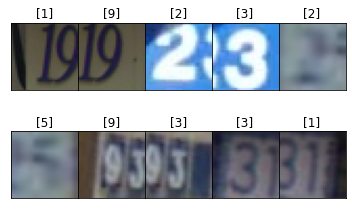

In [ ]:
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(10):
    plt.subplot(2, 5, i+1)

    # title に train["y"]の値を使用
    plt.title(train["y"][i])

    # X軸、Y軸の目盛りの記載の削除
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)

    # 画像の表示
    plt.imshow(train["X"][:,:,:,i])

### 識別器（Discriminator）

In [ ]:
input_dim = 32
num_layesrs_discriminator = 


In [ ]:
discriminator_input = Input(
    shape=input_dim,
    name="discriminator_input"
)

In [ ]:
x = discriminator_input

for i in range(len(num_layesrs_discriminator)):

    x = Conv2D(
        filters = ,
        kernes_size = ,
        strides = ,
        padding = "same",
        name = 'discriminator_conv_' + 
    )(x)

    